In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Image:
    def __init__(self, ImageName):
        self.ImageName = ImageName
        self.original_bgr = None
        self.original_rgb = None
        self._load_initial_image()

    def _load_initial_image(self):
        """Internal method to load the image and convert to RGB for Matplotlib."""
        bgr_image = cv2.imread(self.ImageName)
        if bgr_image is None:
            print(f"Error: Could not load image '{self.ImageName}'. Please check the file path and name.")
            print("Ensure the image is in the same directory as the script or provide a full path.")
            return

        self.original_bgr = bgr_image
        self.original_rgb = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
        print(f"Image '{self.ImageName}' loaded successfully.")

    def _display_image(self, img_array, title="Image", cmap=None):
        """Helper method to display an image with Matplotlib."""
        if img_array is None:
            print(f"Cannot display: Image data for '{title}' is None.")
            return

        plt.imshow(img_array, cmap=cmap)
        plt.title(title)
        plt.axis('off')
        plt.show()

    def ShowOriginalImage(self):
        """Shows the original loaded image."""
        self._display_image(self.original_rgb, "Original Image")

    def GryImage(self):
        """Converts the original image to grayscale."""
        if self.original_bgr is None:
            print("Cannot convert to grayscale: Original image not loaded.")
            return None
        gray_image = cv2.cvtColor(self.original_bgr, cv2.COLOR_BGR2GRAY)
        return gray_image

    def RectangleImage(self, pt1, pt2, color, thick):
        """Draws a rectangle on a copy of the original image and displays it."""
        if self.original_bgr is None: return

        img_copy_bgr = self.original_bgr.copy()
        
        cv2.rectangle(img_copy_bgr, pt1, pt2, color, thick)
        
        img_with_rect_rgb = cv2.cvtColor(img_copy_bgr, cv2.COLOR_BGR2RGB)
        self._display_image(img_with_rect_rgb, "Image with Rectangle")

    def CircleImage(self, center, radius, color, thick):
        """Draws a circle on a copy of the original image and displays it."""
        if self.original_bgr is None: return

        img_copy_bgr = self.original_bgr.copy()

        cv2.circle(img_copy_bgr, center, radius, color, thick)
        
        img_with_circle_rgb = cv2.cvtColor(img_copy_bgr, cv2.COLOR_BGR2RGB)
        self._display_image(img_with_circle_rgb, "Image with Circle")

    def AddText(self, text, org, fontFace, fontScale, color, thick):
        """Adds text to a copy of the original image and displays it."""
        if self.original_bgr is None: return

        img_copy_bgr = self.original_bgr.copy()

        cv2.putText(img_copy_bgr, text, org, fontFace, fontScale, color, thick)
        
        img_with_text_rgb = cv2.cvtColor(img_copy_bgr, cv2.COLOR_BGR2RGB)
        self._display_image(img_with_text_rgb, "Image with Text")

    def FlippedImage(self):
        """Displays original and flipped versions of the image as subplots."""
        if self.original_rgb is None: return

        flipped_h = cv2.flip(self.original_rgb, 1)
        flipped_v = cv2.flip(self.original_rgb, 0)
        flipped_b = cv2.flip(self.original_rgb, -1)

        fig, axes = plt.subplots(2, 2, figsize=(10, 8))
        fig.suptitle('Image Transformations', fontsize=16)
        axes = axes.flatten()

        axes[0].imshow(self.original_rgb)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(flipped_h)
        axes[1].set_title("Flipped Horizontally")
        axes[1].axis('off')

        axes[2].imshow(flipped_v)
        axes[2].set_title("Flipped Vertically")
        axes[2].axis('off')

        axes[3].imshow(flipped_b)
        axes[3].set_title("Flipped Both Ways")
        axes[3].axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    def resize_photo(self):
        """Resizes the original image based on user input and displays it."""
        if self.original_bgr is None: return

        print(f"Current image dimensions: Height={self.original_bgr.shape[0]}, Width={self.original_bgr.shape[1]}")
        try:
            new_width = int(input("Enter new width: "))
            new_height = int(input("Enter new height: "))
        except ValueError:
            print("Invalid input. Please enter integer numbers for width and height.")
            return

        if new_width <= 0 or new_height <= 0:
            print("Width and height must be positive values.")
            return

        resized_bgr = cv2.resize(self.original_bgr, (new_width, new_height), interpolation=cv2.INTER_AREA)
        resized_rgb = cv2.cvtColor(resized_bgr, cv2.COLOR_BGR2RGB)
        self._display_image(resized_rgb, f"Resized Image ({new_width}x{new_height})")

    def save_image(self):
        """Saves either the original or grayscale version of the image."""
        if self.original_bgr is None: return

        save_type = input("Save 'original' (color) or 'grayscale'? (o/g): ").lower()
        output_filename = input("Enter filename to save as (e.g., output.png or output.jpg): ")

        image_to_save = None
        if save_type == 'o':
            image_to_save = self.original_bgr 
        elif save_type == 'g':
            image_to_save = self.GryImage() 
        else:
            print("Invalid save type. Please enter 'o' for original or 'g' for grayscale.")
            return

        if image_to_save is not None:
            try:
                success = cv2.imwrite(output_filename, image_to_save)
                if success:
                    print(f"Image successfully saved as '{output_filename}'")
                else:
                    print(f"Failed to save image '{output_filename}'. Check filename and permissions.")
            except Exception as e:
                print(f"An error occurred while saving: {e}")
        else:
            print("No image data available to save.")

Enter the image name (e.g., girlImage2.jpg):  littleGirl.jpg


Image 'littleGirl.jpg' loaded successfully.

--- Image Operations Menu ---
1. Show Original Image
2. Draw Rectangle
3. Draw Circle
4. Add Text
5. Show Flipped Images
6. Resize Image
7. Save Image (Original/Grayscale)
8. Exit


Enter your choice (1-8):  1


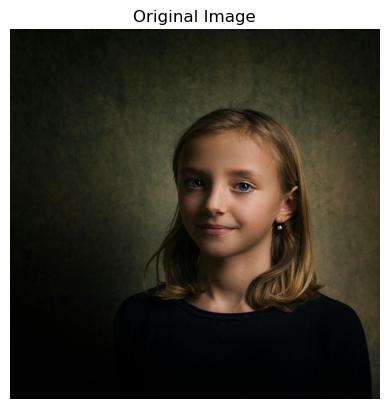


--- Image Operations Menu ---
1. Show Original Image
2. Draw Rectangle
3. Draw Circle
4. Add Text
5. Show Flipped Images
6. Resize Image
7. Save Image (Original/Grayscale)
8. Exit


Enter your choice (1-8):  2
Enter x1 for rectangle:  200
Enter y1 for rectangle:  250
Enter x2 for rectangle:  300
Enter y2 for rectangle:  500
Enter Red color (0-255):  0
Enter Green color (0-255):  233
Enter Blue color (0-255):  233
Enter thickness:  3


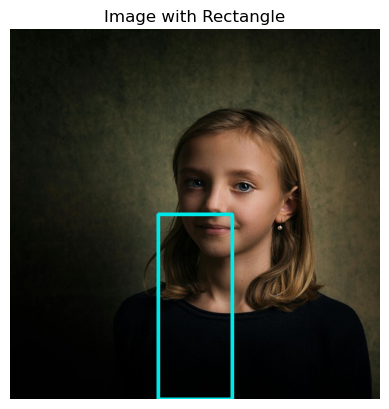


--- Image Operations Menu ---
1. Show Original Image
2. Draw Rectangle
3. Draw Circle
4. Add Text
5. Show Flipped Images
6. Resize Image
7. Save Image (Original/Grayscale)
8. Exit


Enter your choice (1-8):  3
Enter center x for circle:  100
Enter center y for circle:  100
Enter radius:  50
Enter Red color (0-255):  0
Enter Green color (0-255):  0
Enter Blue color (0-255):  233
Enter thickness (-1 for filled):  4


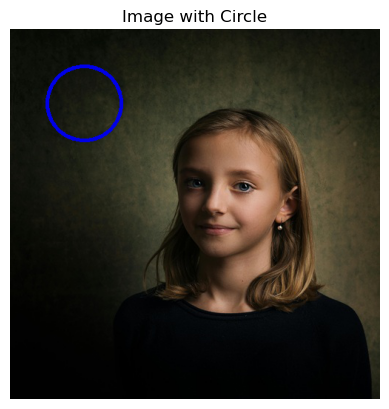


--- Image Operations Menu ---
1. Show Original Image
2. Draw Rectangle
3. Draw Circle
4. Add Text
5. Show Flipped Images
6. Resize Image
7. Save Image (Original/Grayscale)
8. Exit


Enter your choice (1-8):  4
Enter text to add:  Hello Little Girl
Enter text origin x:  200
Enter text origin y:  300
Enter font scale (e.g., 1.0):  1
Enter Red color (0-255):  0
Enter Green color (0-255):  122
Enter Blue color (0-255):  123
Enter thickness:  3


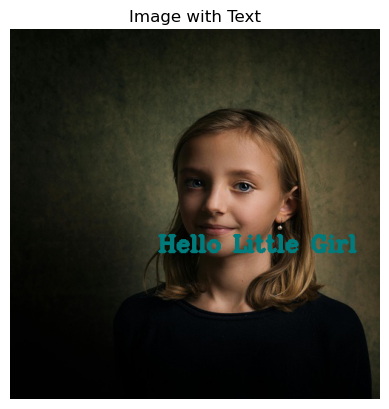


--- Image Operations Menu ---
1. Show Original Image
2. Draw Rectangle
3. Draw Circle
4. Add Text
5. Show Flipped Images
6. Resize Image
7. Save Image (Original/Grayscale)
8. Exit


Enter your choice (1-8):  5


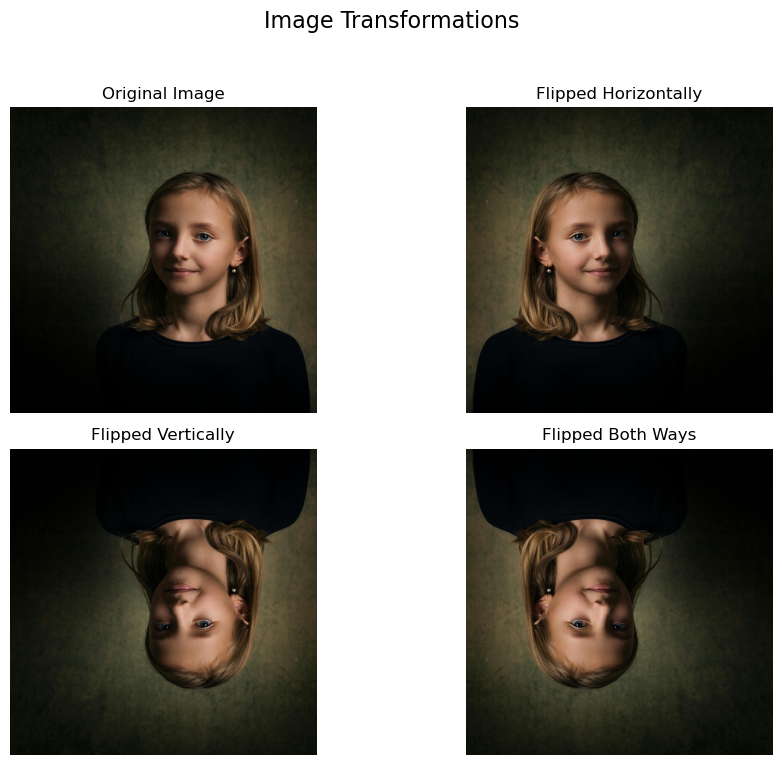


--- Image Operations Menu ---
1. Show Original Image
2. Draw Rectangle
3. Draw Circle
4. Add Text
5. Show Flipped Images
6. Resize Image
7. Save Image (Original/Grayscale)
8. Exit


Enter your choice (1-8):  6


Current image dimensions: Height=500, Width=500


Enter new width:  300
Enter new height:  300


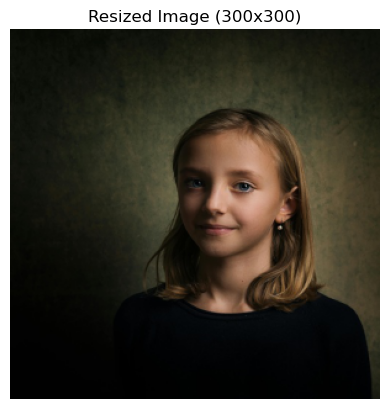


--- Image Operations Menu ---
1. Show Original Image
2. Draw Rectangle
3. Draw Circle
4. Add Text
5. Show Flipped Images
6. Resize Image
7. Save Image (Original/Grayscale)
8. Exit


Enter your choice (1-8):  7


In [ ]:
# --- Main interactive loop ---
if __name__ == "__main__":
    image_name = input("Enter the image name (e.g., girlImage2.jpg): ")
    img_processor = Image(image_name)

    if img_processor.original_bgr is None:
        print("Exiting due to image loading error.")
    else:
        while True:
            print("\n--- Image Operations Menu ---")
            print("1. Show Original Image")
            print("2. Draw Rectangle")
            print("3. Draw Circle")
            print("4. Add Text")
            print("5. Show Flipped Images")
            print("6. Resize Image")
            print("7. Save Image (Original/Grayscale)")
            print("8. Exit")

            choice = input("Enter your choice (1-8): ")

            if choice == '1':
                img_processor.ShowOriginalImage()
            elif choice == '2':
                try:
                    x1 = int(input("Enter x1 for rectangle: "))
                    y1 = int(input("Enter y1 for rectangle: "))
                    x2 = int(input("Enter x2 for rectangle: "))
                    y2 = int(input("Enter y2 for rectangle: "))
                    r = int(input("Enter Red color (0-255): "))
                    g = int(input("Enter Green color (0-255): "))
                    b = int(input("Enter Blue color (0-255): "))
                    thick = int(input("Enter thickness: "))
                    img_processor.RectangleImage((x1, y1), (x2, y2), (b, g, r), thick) 
                except ValueError:
                    print("Invalid input. Please enter numbers for coordinates, colors, and thickness.")
            elif choice == '3':
                try:
                    cx = int(input("Enter center x for circle: "))
                    cy = int(input("Enter center y for circle: "))
                    radius = int(input("Enter radius: "))
                    r = int(input("Enter Red color (0-255): "))
                    g = int(input("Enter Green color (0-255): "))
                    b = int(input("Enter Blue color (0-255): "))
                    thick = int(input("Enter thickness (-1 for filled): "))
                    img_processor.CircleImage((cx, cy), radius, (b, g, r), thick) 
                except ValueError:
                    print("Invalid input. Please enter numbers for coordinates, radius, colors, and thickness.")
            elif choice == '4':
                try:
                    text_to_add = input("Enter text to add: ")
                    tx = int(input("Enter text origin x: "))
                    ty = int(input("Enter text origin y: "))
                    scale = float(input("Enter font scale (e.g., 1.0): "))
                    r = int(input("Enter Red color (0-255): "))
                    g = int(input("Enter Green color (0-255): "))
                    b = int(input("Enter Blue color (0-255): "))
                    thick = int(input("Enter thickness: "))
                    img_processor.AddText(text_to_add, (tx, ty), cv2.FONT_HERSHEY_COMPLEX, scale, (b, g, r), thick)
                except ValueError:
                    print("Invalid input. Please enter valid values for text parameters.")
            elif choice == '5':
                img_processor.FlippedImage()
            elif choice == '6':
                img_processor.resize_photo()
            elif choice == '7':
                img_processor.save_image()
            elif choice == '8':
                print("Exiting program. Goodbye!")
                break
            else:
                print("Invalid choice. Please enter a number between 1 and 8.")
